In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import time
import folium
from IPython.display import display

In [2]:
df = pd.read_csv('job_descriptions.csv')

In [3]:
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [4]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

In [6]:
df.isnull().sum()

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

In [7]:
df.describe()

,Job Id,latitude,longitude,Company Size
count,1.615940e+06,1.615940e+06,1.615940e+06,1.615940e+06
mean,1.548935e+15,1.937743e+01,1.639926e+01,7.370467e+04
std,8.946722e+14,2.355690e+01,7.066762e+01,3.529886e+04
min,1.817948e+11,-4.090060e+01,-1.751982e+02,1.264600e+04
25%,7.740508e+14,5.152100e+00,-1.531010e+01,4.311400e+04
50%,1.547858e+15,1.807080e+01,1.914510e+01,7.363300e+04
75%,2.323729e+15,3.907420e+01,4.757690e+01,1.043000e+05
max,3.099618e+15,7.170690e+01,1.780650e+02,1.348340e+05


In [8]:
df.shape

(1615940, 23)

In [9]:
df['Qualifications'].unique()

array(['M.Tech', 'BCA', 'PhD', 'MBA', 'MCA', 'M.Com', 'BBA', 'B.Tech',
       'B.Com', 'BA'], dtype=object)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Job Id              0
Experience          0
Qualifications      0
Salary Range        0
location            0
Country             0
latitude            0
longitude           0
Work Type           0
Company Size        0
Job Posting Date    0
Preference          0
Contact Person      0
Contact             0
Job Title           0
Role                0
Job Portal          0
Job Description     0
Benefits            0
skills              0
Responsibilities    0
Company             0
Company Profile     0
dtype: int64

In [12]:
df.shape

(1610462, 23)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(1610462, 23)

In [15]:
# # Convert DataFrame to CSV file
# df.to_csv('Job_des.csv', index=False)

# Task - 1

 1.Draw a chart between company size and company name where company size<50000 and job title should be mechanical engineer and experience should not be more than 5 years and country should be Asian as well as salary should be more than $50k and the work type should be both part time and full time and ignore all other work types and the preference should be male .we should filter candidates those who are applied on idealist and this chart should work on only between 3 Pm to 6 Pm.

In [16]:
df.dtypes

Job Id                int64
Experience           object
Qualifications       object
Salary Range         object
location             object
Country              object
latitude            float64
longitude           float64
Work Type            object
Company Size          int64
Job Posting Date     object
Preference           object
Contact Person       object
Contact              object
Job Title            object
Role                 object
Job Portal           object
Job Description      object
Benefits             object
skills               object
Responsibilities     object
Company              object
Company Profile      object
dtype: object

In [17]:
df['Job Title'].unique()

array(['Digital Marketing Specialist', 'Web Developer',
       'Operations Manager', 'Network Engineer', 'Event Manager',
       'Software Tester', 'Teacher', 'UX/UI Designer', 'Wedding Planner',
       'QA Analyst', 'Litigation Attorney', 'Mechanical Engineer',
       'Network Administrator', 'Account Manager', 'Brand Manager',
       'Social Worker', 'Social Media Coordinator',
       'Email Marketing Specialist', 'HR Generalist', 'Legal Assistant',
       'Nurse Practitioner', 'Account Director', 'Software Engineer',
       'Purchasing Agent', 'Sales Consultant', 'Civil Engineer',
       'Network Security Specialist', 'UI Developer', 'Financial Planner',
       'Event Planner', 'Psychologist', 'Electrical Designer',
       'Data Analyst', 'Technical Writer', 'Tax Consultant',
       'Account Executive', 'Systems Administrator',
       'Database Administrator', 'Research Analyst', 'Data Entry Clerk',
       'Registered Nurse', 'Investment Analyst', 'Speech Therapist',
       'Sales M

In [18]:
df['Salary Range'].unique()

array(['$59K-$99K', '$56K-$116K', '$61K-$104K', '$65K-$91K', '$64K-$87K',
       '$59K-$93K', '$63K-$103K', '$65K-$102K', '$60K-$80K', '$57K-$104K',
       '$64K-$98K', '$65K-$122K', '$56K-$86K', '$57K-$98K', '$65K-$100K',
       '$60K-$83K', '$55K-$117K', '$55K-$121K', '$65K-$128K',
       '$62K-$120K', '$58K-$116K', '$62K-$124K', '$60K-$104K',
       '$58K-$107K', '$59K-$88K', '$64K-$100K', '$63K-$86K', '$65K-$119K',
       '$55K-$83K', '$65K-$115K', '$57K-$121K', '$65K-$82K', '$62K-$130K',
       '$58K-$129K', '$60K-$89K', '$64K-$103K', '$57K-$100K', '$58K-$81K',
       '$56K-$109K', '$62K-$129K', '$65K-$95K', '$56K-$82K', '$59K-$80K',
       '$64K-$130K', '$59K-$89K', '$57K-$97K', '$62K-$127K', '$55K-$105K',
       '$59K-$123K', '$59K-$114K', '$64K-$92K', '$60K-$102K',
       '$63K-$109K', '$57K-$125K', '$65K-$88K', '$65K-$117K',
       '$61K-$111K', '$56K-$94K', '$65K-$121K', '$65K-$84K', '$55K-$96K',
       '$59K-$101K', '$63K-$114K', '$64K-$82K', '$56K-$125K', '$64K-$83K',
     

In [19]:
df['Experience'].unique()

array(['5 to 15 Years', '2 to 12 Years', '0 to 12 Years', '4 to 11 Years',
       '1 to 12 Years', '4 to 12 Years', '3 to 15 Years', '2 to 8 Years',
       '2 to 9 Years', '1 to 10 Years', '3 to 10 Years', '1 to 8 Years',
       '1 to 9 Years', '5 to 14 Years', '0 to 11 Years', '3 to 12 Years',
       '5 to 9 Years', '0 to 15 Years', '0 to 10 Years', '2 to 14 Years',
       '3 to 9 Years', '4 to 15 Years', '2 to 10 Years', '4 to 8 Years',
       '3 to 8 Years', '1 to 14 Years', '1 to 13 Years', '0 to 8 Years',
       '5 to 10 Years', '2 to 13 Years', '4 to 9 Years', '1 to 15 Years',
       '4 to 10 Years', '5 to 12 Years', '0 to 13 Years', '4 to 14 Years',
       '1 to 11 Years', '4 to 13 Years', '0 to 9 Years', '5 to 8 Years',
       '2 to 15 Years', '5 to 13 Years', '5 to 11 Years', '0 to 14 Years',
       '3 to 13 Years', '2 to 11 Years', '3 to 11 Years', '3 to 14 Years'],
      dtype=object)

In [20]:
df['Job Posting Date'].unique()

array(['2022-04-24', '2022-12-19', '2022-09-14', '2023-02-25',
       '2022-10-11', '2023-07-25', '2023-04-10', '2022-09-20',
       '2022-02-19', '2022-05-13', '2023-07-01', '2021-10-11',
       '2022-01-17', '2022-05-24', '2022-03-01', '2023-08-25',
       '2022-04-19', '2022-05-18', '2021-12-29', '2022-07-27',
       '2022-02-13', '2023-09-03', '2023-08-26', '2022-07-03',
       '2023-08-02', '2021-11-16', '2022-11-28', '2023-01-23',
       '2023-01-21', '2023-06-06', '2023-03-19', '2023-06-01',
       '2022-02-05', '2023-03-27', '2022-11-02', '2023-08-31',
       '2022-02-06', '2022-02-25', '2023-01-15', '2023-02-09',
       '2023-06-15', '2022-03-30', '2022-05-30', '2021-10-28',
       '2023-08-05', '2023-05-29', '2022-04-23', '2022-01-05',
       '2021-11-27', '2023-01-24', '2023-05-11', '2022-12-22',
       '2023-01-11', '2023-05-06', '2021-10-26', '2023-03-07',
       '2023-09-13', '2022-09-28', '2023-04-08', '2023-08-22',
       '2021-11-20', '2023-02-28', '2023-01-20', '2021-

In [21]:
df['Job Portal'].unique()

array(['Snagajob', 'Idealist', 'Jobs2Careers', 'FlexJobs', 'Indeed',
       'Stack Overflow Jobs', 'Glassdoor', 'USAJOBS', 'SimplyHired',
       'Internships.com', 'The Muse', 'Dice', 'CareerBuilder', 'Monster',
       'ZipRecruiter', 'LinkedIn'], dtype=object)

In [22]:
df['Country'].unique()

array(['Isle of Man', 'Turkmenistan', 'Macao SAR, China', 'Benin',
       'Chile', 'Belgium', 'Cayman Islands', 'Sao Tome and Principe',
       'Maldives', 'Antigua and Barbuda', 'Bahrain', 'Bermuda', 'Jamaica',
       'Gambia', 'Syrian Arab Republic', 'Yemen', 'San Marino',
       'French Polynesia', 'North Korea', 'Democratic Republic Of Congo',
       'Azerbaijan', 'Tuvalu', 'Eritrea', 'Honduras',
       'British Virgin Islands', 'Cuba', 'Hungary', 'Paraguay', 'Jordan',
       'Nigeria', 'Libya', 'Australia', 'New Caledonia', 'Oman',
       'West Bank and Gaza', 'Solomon Islands', "Cote d'Ivoire",
       'Ecuador', 'Virgin Islands (U.S.)', 'Cameroon', 'Comoros', 'Spain',
       'Belize', 'Malta', 'Panama', 'Republic Of Congo',
       'Turks and Caicos Islands', 'Cambodia', 'Monaco', 'Armenia',
       'Guam', 'St. Lucia', 'India', 'Somalia', 'Pakistan', 'Brunei',
       'Dominica', 'UK', 'Afghanistan', 'Mongolia', 'Slovak Republic',
       'Morocco', 'South Africa', 'Botswana', 'St. 

In [23]:
df['Work Type'].unique()

array(['Intern', 'Temporary', 'Full-Time', 'Contract', 'Part-Time'],
      dtype=object)

In [24]:
df['Preference'].unique()

array(['Female', 'Male', 'Both'], dtype=object)

In [25]:
df['Company Size'].unique()

array([ 26801, 100340,  84525, ...,  90567, 122878,  77557])

In [26]:
t1 = df.copy()

In [27]:
t1.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


### Convert Salary Range

In [28]:
def clean_salary_range(salary_range):
    if isinstance(salary_range, str):
        parts = salary_range.replace(' ', '').split('-')
        if len(parts) == 2:
            try:
                min_salary = int(parts[0].replace('$', '').replace('K', '')) * 1000
                max_salary = int(parts[1].replace('$', '').replace('K', '')) * 1000
                return pd.Series([min_salary, max_salary])
            except ValueError:
                return pd.Series([np.nan, np.nan])
    return pd.Series([np.nan, np.nan])
t1[['Min Salary', 'Max Salary']] = t1['Salary Range'].apply(clean_salary_range)

In [29]:
t1[['Min Salary', 'Max Salary']]

,Min Salary,Max Salary
0,59000,99000
1,56000,116000
2,61000,104000
3,65000,91000
4,64000,87000
...,...,...
1615935,64000,114000
1615936,62000,130000
1615937,60000,96000
1615938,65000,103000


In [30]:
t1.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Min Salary,Max Salary
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",59000,99000
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",56000,116000
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",61000,104000
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",65000,91000
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",64000,87000


### Calculate Average Salarr

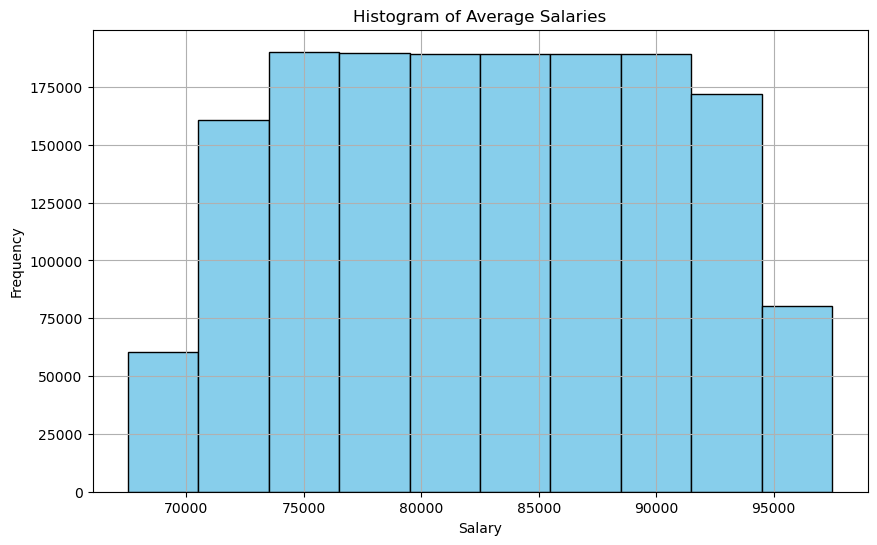

In [31]:
t1['Average Salary'] = (t1['Min Salary'] + t1['Max Salary']) / 2
plt.figure(figsize=(10, 6))
plt.hist(t1['Average Salary'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Average Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Calculate Experience Range

In [32]:
def extract_years_range(range_str):
    pattern = r'(\d+)\s+to\s+(\d+)\s+Years'
    match = re.match(pattern, range_str)
    if match:
        start_year = int(match.group(1))
        end_year = int(match.group(2))
        midpoint = (start_year + end_year) / 2
        return midpoint
    else:
        return None
t1['Experience_Midpoint'] = t1['Experience'].apply(extract_years_range)

In [33]:
t1.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Average Salary,Experience_Midpoint
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",59000,99000,79000.0,10.0
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",56000,116000,86000.0,7.0
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",61000,104000,82500.0,6.0
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",65000,91000,78000.0,7.5
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",64000,87000,75500.0,6.5


In [34]:
correlation = t1['Average Salary'].corr(t1['Experience_Midpoint'])
print(f"Correlation between Average Salary and Experience: {correlation:.2f}")

Correlation between Average Salary and Experience: 0.00


### Scatter plot

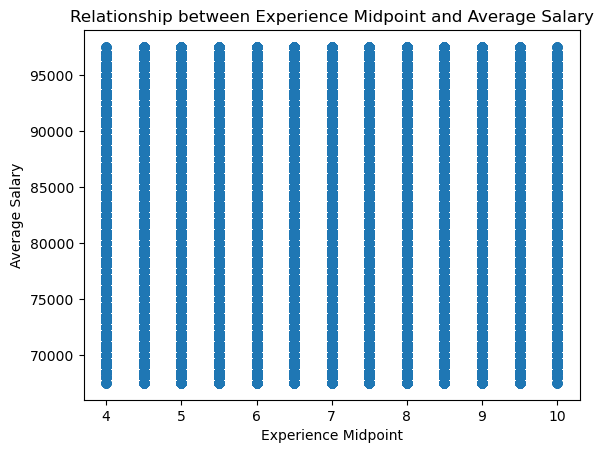

In [35]:
plt.scatter(t1['Experience_Midpoint'], t1['Average Salary'])
plt.xlabel('Experience Midpoint')
plt.ylabel('Average Salary')
plt.title('Relationship between Experience Midpoint and Average Salary')
plt.show()

### Calculate Minimum & Maximum Experience

In [36]:
def extract_experience_range(experience):
    min_exp, max_exp = experience.split(' to ')
    return int(min_exp), int(max_exp.split()[0])
t1['Min Experience'], t1['Max Experience'] = zip(*t1['Experience'].apply(extract_experience_range))

In [37]:
t1['Average Experience'] = (t1['Min Experience'] + t1['Max Experience']) / 2

In [38]:
t1['Min Experience'] = t1['Min Experience'].astype(int)
t1['Max Experience'] = t1['Max Experience'].astype(int)

In [39]:
t1.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Average Salary,Experience_Midpoint,Min Experience,Max Experience,Average Experience
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,"Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",59000,99000,79000.0,10.0,5,15,10.0
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,"Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",56000,116000,86000.0,7.0,2,12,7.0
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",61000,104000,82500.0,6.0,0,12,6.0
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",65000,91000,78000.0,7.5,4,11,7.5
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",64000,87000,75500.0,6.5,1,12,6.5


In [40]:
correlation = t1['Average Salary'].corr(t1['Average Experience'])
print(f"\nCorrelation between Average Salary and Average Experience: {correlation:.2f}")


Correlation between Average Salary and Average Experience: 0.00


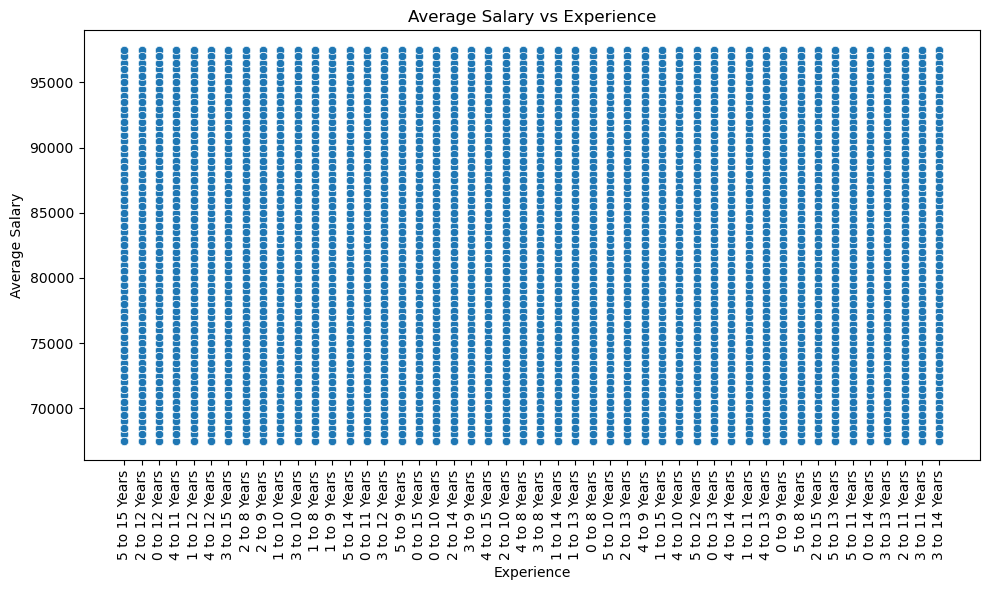

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Experience', y='Average Salary', data=t1)
plt.title('Average Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [42]:
t1['Job Posting Date'] = pd.to_datetime(t1['Job Posting Date'])

In [43]:
t1.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile',
       'Min Salary', 'Max Salary', 'Average Salary', 'Experience_Midpoint',
       'Min Experience', 'Max Experience', 'Average Experience'],
      dtype='object')

In [44]:
t1.dtypes

Job Id                          int64
Experience                     object
Qualifications                 object
Salary Range                   object
location                       object
Country                        object
latitude                      float64
longitude                     float64
Work Type                      object
Company Size                    int64
Job Posting Date       datetime64[ns]
Preference                     object
Contact Person                 object
Contact                        object
Job Title                      object
Role                           object
Job Portal                     object
Job Description                object
Benefits                       object
skills                         object
Responsibilities               object
Company                        object
Company Profile                object
Min Salary                      int64
Max Salary                      int64
Average Salary                float64
Experience_M

In [45]:
t1['Job Posting Date']

0         2022-04-24
1         2022-12-19
2         2022-09-14
3         2023-02-25
4         2022-10-11
             ...    
1615935   2022-05-19
1615936   2023-03-14
1615937   2022-01-23
1615938   2021-12-28
1615939   2022-10-01
Name: Job Posting Date, Length: 1610462, dtype: datetime64[ns]

In [108]:
asian_countries = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia',
                   'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
                   'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 
                   'Myanmar', 'Burma', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 
                   'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan',
                   'Thailand', 'Timor-Leste', 'East Timor', 'Turkey', 'Turkmenistan', 'United Arab Emirate', 'UAE',
                   'Uzbekistan', 'Vietnam', 'Yemen']

In [130]:
filtered_data = t1[
    (t1['Company Size'] < 50000) &                              # Company size less than 50000
    (t1['Job Title'] == 'Mechanical Engineer') &                # Job title is Mechanical Engineer
    (t1['Min Experience'] <= 5) &                               # Max experience is not more than 5 years
    (t1['Country'].isin(asian_countries)) &                     # Country is Asian
    (t1['Min Salary'] > 50000) &                                # Minimum salary greater than $50k
    (t1['Work Type'].isin(['Part-Time', 'Full-Time'])) &        # Work type is Part Time or Full Time
    (t1['Preference'] == 'Male')  &                             # Preference is male
    (t1['Job Portal'] == 'Idealist')                            # Applied on Idealist
]


In [131]:
filtered_data

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Average Salary,Experience_Midpoint,Min Experience,Max Experience,Average Experience
272603,3012549628610580,5 to 13 Years,MBA,$64K-$130K,Phnom Penh,Cambodia,12.5657,104.9909,Full-Time,16187,...,Improve manufacturing processes and production...,General Dynamics,"{""Sector"":""Aerospace and Defense"",""Industry"":""...",64000,130000,97000.0,9.0,5,13,9.0
408996,2962204826386836,1 to 14 Years,BCA,$55K-$103K,Dushanbe,Tajikistan,38.8610,71.2761,Full-Time,24667,...,"Design mechanical systems, components, and pro...",Stanley Black & Decker,"{""Sector"":""Tools & Equipment"",""Industry"":""Home...",55000,103000,79000.0,7.5,1,14,7.5
978105,266789044204620,2 to 15 Years,BBA,$56K-$110K,Baku,Azerbaijan,40.1431,47.5769,Full-Time,22149,...,"Specialize in heating, ventilation, and air co...",Deutsche Post DHL Group,"{""Sector"":""Logistics"",""Industry"":""Logistics & ...",56000,110000,83000.0,8.5,2,15,8.5
1028119,2940210771609305,2 to 14 Years,MBA,$63K-$120K,Beirut,Lebanon,33.8547,35.8623,Part-Time,19246,...,"Design mechanical systems, components, and pro...",Knight-Swift Transportation Holdings,"{""Sector"":""Industrials"",""Industry"":""Trucking, ...",63000,120000,91500.0,8.0,2,14,8.0
1161414,2156831703282090,3 to 8 Years,MBA,$61K-$83K,Dushanbe,Tajikistan,38.8610,71.2761,Part-Time,17450,...,Improve manufacturing processes and production...,Smith & Nephew,"{""Sector"":""Healthcare"",""Industry"":""Medical Dev...",61000,83000,72000.0,5.5,3,8,5.5
1362250,1405363094001405,0 to 15 Years,BCA,$56K-$93K,Ulaanbaatar,Mongolia,46.8625,103.8467,Part-Time,45090,...,"Specialize in heating, ventilation, and air co...",UGI,"{""Sector"":""Utilities"",""Industry"":""Utilities: G...",56000,93000,74500.0,7.5,0,15,7.5
1376452,752990330929399,2 to 13 Years,BA,$57K-$128K,Islamabad,Pakistan,30.3753,69.3451,Full-Time,23766,...,"Specialize in heating, ventilation, and air co...",Xiaomi Corporation,"{""Sector"":""Technology and Electronics"",""Indust...",57000,128000,92500.0,7.5,2,13,7.5


In [132]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# List of Asian countries for filtering
asian_countries = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia',
                   'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
                   'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 
                   'Myanmar', 'Burma', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 
                   'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan',
                   'Thailand', 'Timor-Leste', 'East Timor', 'Turkey', 'Turkmenistan', 'United Arab Emirate', 'UAE',
                   'Uzbekistan', 'Vietnam', 'Yemen']

# Function to filter and plot the data
def filter_and_plot(t1):
    # Get the current hour
    current_hour = datetime.now().hour

    # Check if the current time is between 3 PM and 6 PM
    if 15 <= current_hour < 18:
        # Apply the filters
        filtered_df = t1[
            (t1['Company Size'] < 50000) &
            (t1['Job Title'].str.contains('Mechanical Engineer', case=False, na=False)) &
            (t1['Min Experience'] <= 5) &
            (t1['Country'].isin(asian_countries)) &
            (t1['Average Salary'] > 50000) &
            (t1['Work Type'].isin(['Part-Time', 'Full-Time'])) &
            (t1['Preference'].str.contains('Male', case=False, na=False)) &
            (t1['Job Portal'].str.contains('Idealist', case=False, na=False))
        ]

        # Group by 'Company' and 'Company Size'
        grouped_df = filtered_df.groupby('Company')['Company Size'].mean().reset_index()

        # Clear the previous plot
        plt.clf()

        # Plotting the chart
        plt.figure(figsize=(10, 8))
        plt.barh(grouped_df['Company'], grouped_df['Company Size'], color='skyblue')
        plt.xlabel('Company Size')
        plt.ylabel('Company Name')
        plt.title('Company Size vs Company Name')
        plt.tight_layout()

        # Show the plot
        plt.show()

    else:
        print("Current time is not between 3 PM to 6 PM")


<Figure size 640x480 with 0 Axes>

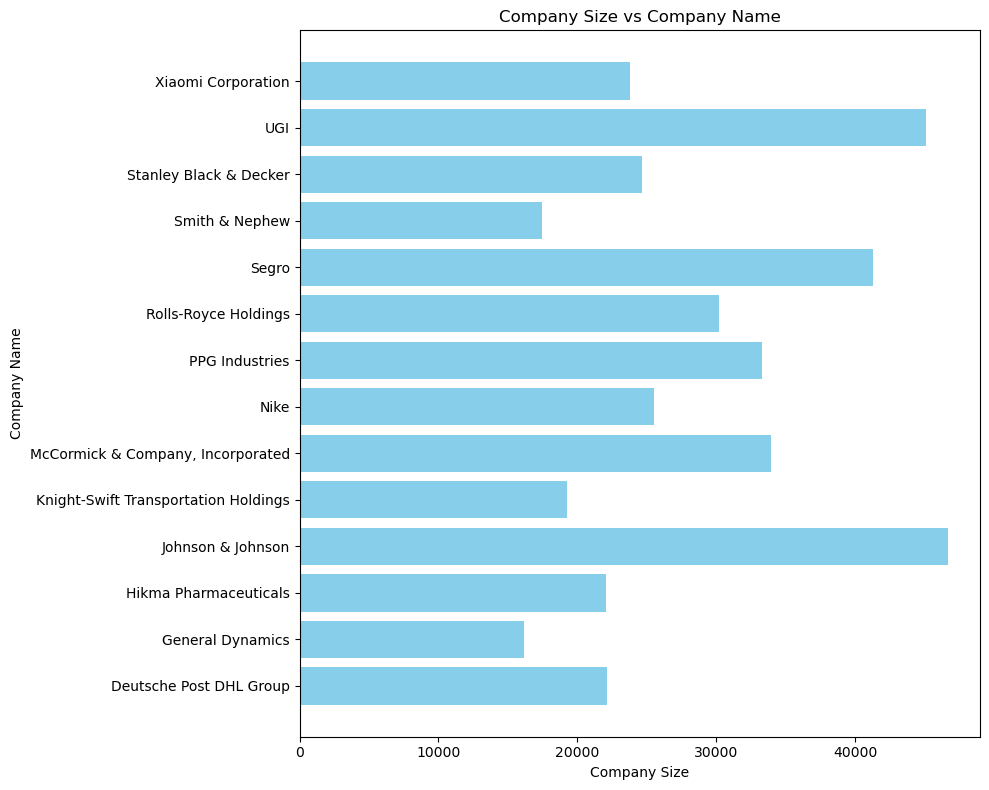

<Figure size 640x480 with 0 Axes>

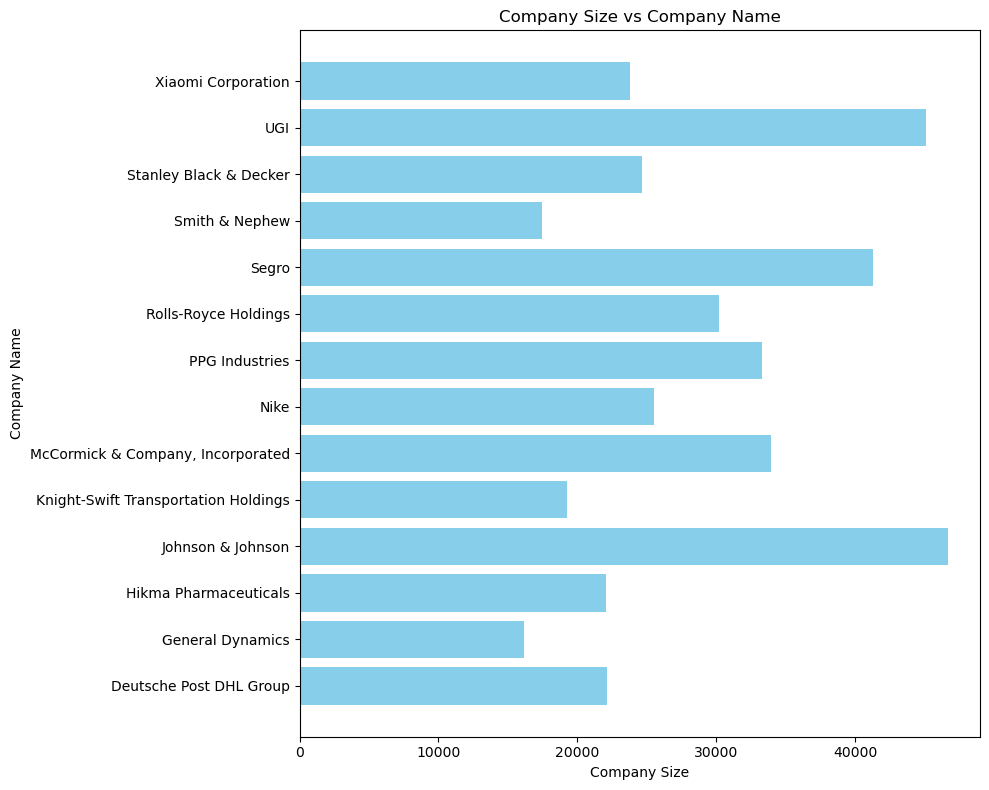

In [134]:
# Run the function for a fixed number of iterations
num_iterations = 2
for _ in range(num_iterations):
    filter_and_plot(t1)
    time.sleep(10) 

# TASK - 2

2.Draw a chart where qualification=’B.tech,M.tech,PhD’ and work type=’Full time’. The country should be African continent and ignore other countries .Job title should be starting with letter ‘D’ and preference should be a Male.The company size should more than 80000. The contact person should be starting with letter ‘A’ and jon portal should be indeed . We need to place a latitude and longitude and if we click on latitude and longitude we will open a map and show the exact location.

In [57]:
t1.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile',
       'Min Salary', 'Max Salary', 'Average Salary', 'Experience_Midpoint',
       'Min Experience', 'Max Experience', 'Average Experience'],
      dtype='object')

In [58]:
t1['Contact Person'].unique()

array(['Brandon Cunningham', 'Francisco Larsen', 'Gary Gibson', ...,
       'Ricky Mendez', 'Debbie Osborne', 'Casey Cochran'], dtype=object)

In [62]:
t1['Qualifications'].unique()

array(['M.Tech', 'BCA', 'PhD', 'MBA', 'MCA', 'M.Com', 'BBA', 'B.Tech',
       'B.Com', 'BA'], dtype=object)

In [139]:
filtered_t1

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Average Salary,Experience_Midpoint,Min Experience,Max Experience,Average Experience
70556,2917677359612975,2 to 12 Years,B.Tech,$57K-$118K,Cairo,Egypt,26.8206,30.8025,Full-Time,125604,...,Specialize in the treatment of gum diseases an...,Advance Auto Parts,"{""Sector"":""Automotive Parts"",""Industry"":""Speci...",57000,118000,87500.0,7.0,2,12,7.0
522496,3010384656212711,3 to 15 Years,B.Tech,$64K-$115K,Djibouti (city),Djibouti,11.8251,42.5903,Full-Time,87329,...,Implement and maintain security measures to pr...,NVR,"{""Sector"":""Home Construction"",""Industry"":""Home...",64000,115000,89500.0,9.0,3,15,9.0
539634,969929248634337,1 to 15 Years,M.Tech,$59K-$115K,Conakry,Guinea,9.9456,-9.6966,Full-Time,82784,...,"Extract, transform, and load (ETL) data from v...",Penske Automotive Group,"{""Sector"":""Automotive"",""Industry"":""Automotive ...",59000,115000,87000.0,8.0,1,15,8.0
579654,351493937569589,1 to 8 Years,PhD,$56K-$114K,Banjul,Gambia,13.4432,-15.3101,Full-Time,124085,...,"Work with large and complex datasets, using te...",Indiabulls Housing Finance,"{""Sector"":""Financial Services"",""Industry"":""Fin...",56000,114000,85000.0,4.5,1,8,4.5
726208,2709923021590259,0 to 10 Years,M.Tech,$62K-$89K,Gaborone,Botswana,-22.3285,24.6849,Full-Time,118295,...,"Plan and execute email marketing campaigns, in...",Bank of China,"{""Sector"":""Banking"",""Industry"":""Banking & Fina...",62000,89000,75500.0,5.0,0,10,5.0
784752,2622430459914114,2 to 8 Years,B.Tech,$58K-$122K,Khartoum,Sudan,12.8628,30.2176,Full-Time,113873,...,Ensure data accuracy and quality by identifyin...,The Clorox Company,"{""Sector"":""Consumer Goods/Homecare"",""Industry""...",58000,122000,90000.0,5.0,2,8,5.0
844372,2062539967084591,0 to 8 Years,M.Tech,$64K-$101K,Dakar,Senegal,14.4974,-14.4524,Full-Time,106263,...,Gather and analyze data to provide insights fo...,The Coca-Cola Company,"{""Sector"":""Food and Beverage"",""Industry"":""Beve...",64000,101000,82500.0,4.0,0,8,4.0
1016212,484782242503071,1 to 10 Years,M.Tech,$65K-$103K,Rabat,Morocco,31.7917,-7.0926,Full-Time,128899,...,"Design and implement database systems, tables,...",Associated British Foods,"{""Sector"":""Food and Beverage"",""Industry"":""Food...",65000,103000,84000.0,5.5,1,10,5.5
1086855,496800909795158,4 to 12 Years,PhD,$62K-$87K,Maseru,Lesotho,-29.6099,28.2336,Full-Time,102280,...,Gather and analyze data to provide insights fo...,Lennar,"{""Sector"":""Construction"",""Industry"":""Homebuild...",62000,87000,74500.0,8.0,4,12,8.0
1143112,2285998167075285,5 to 12 Years,M.Tech,$61K-$106K,Freetown,Sierra Leone,8.4606,-11.7799,Full-Time,119845,...,Apply machine learning algorithms and statisti...,Bajaj Finance,"{""Sector"":""Financial Services"",""Industry"":""Ban...",61000,106000,83500.0,8.5,5,12,8.5


In [70]:
t1['Qualifications'].isin(qualification_criteria)

0           True
1          False
2           True
3           True
4          False
           ...  
1615935     True
1615936     True
1615937    False
1615938    False
1615939    False
Name: Qualifications, Length: 1610462, dtype: bool

In [71]:
t1['Work Type'] == work_type_criteria

0          False
1          False
2          False
3           True
4          False
           ...  
1615935     True
1615936    False
1615937    False
1615938     True
1615939    False
Name: Work Type, Length: 1610462, dtype: bool

In [72]:
t1['Country'].isin(african_countries)

0          False
1          False
2          False
3           True
4          False
           ...  
1615935     True
1615936    False
1615937    False
1615938     True
1615939     True
Name: Country, Length: 1610462, dtype: bool

In [73]:
t1['Job Title'].apply(job_title_criteria)

0           True
1          False
2          False
3          False
4          False
           ...  
1615935    False
1615936    False
1615937    False
1615938    False
1615939    False
Name: Job Title, Length: 1610462, dtype: bool

In [74]:
t1['Preference'] == preference_criteria

0          False
1          False
2           True
3          False
4          False
           ...  
1615935    False
1615936     True
1615937    False
1615938    False
1615939     True
Name: Preference, Length: 1610462, dtype: bool

In [76]:
t1['Company Size'] > company_size_criteria

0          False
1           True
2           True
3           True
4          False
           ...  
1615935    False
1615936    False
1615937     True
1615938    False
1615939     True
Name: Company Size, Length: 1610462, dtype: bool

In [78]:
t1['Job Portal'] == job_portal_criteria

0          False
1          False
2          False
3          False
4          False
           ...  
1615935    False
1615936    False
1615937     True
1615938    False
1615939    False
Name: Job Portal, Length: 1610462, dtype: bool

In [77]:
t1['Contact Person'].apply(contact_person_criteria)

0          False
1          False
2          False
3          False
4          False
           ...  
1615935    False
1615936    False
1615937    False
1615938    False
1615939    False
Name: Contact Person, Length: 1610462, dtype: bool

In [88]:
t1['Contact Person'].str.startswith('A')

0          False
1          False
2          False
3          False
4          False
           ...  
1615935    False
1615936    False
1615937    False
1615938    False
1615939    False
Name: Contact Person, Length: 1610462, dtype: bool

In [89]:
filtered_t1 = t1[t1['Contact Person'].str.startswith(('A', 'a'))]

In [90]:
filtered_t1

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Average Salary,Experience_Midpoint,Min Experience,Max Experience,Average Experience
14,1627539131873813,1 to 9 Years,MCA,$57K-$98K,Damascus,Syrian Arab Republic,34.8021,38.9968,Full-Time,92128,...,Manage sales accounts and ensure revenue growt...,NGL Energy Partners,"{""Sector"":""Energy"",""Industry"":""Pipelines"",""Cit...",57000,98000,77500.0,5.0,1,9,5.0
18,235216486127884,3 to 12 Years,BA,$55K-$121K,Seoul,North Korea,40.3399,127.5101,Contract,126630,...,"Focus on email deliverability, monitoring emai...",3M,"{""Sector"":""Conglomerate"",""Industry"":""Chemicals...",55000,121000,88000.0,7.5,3,12,7.5
35,981851940397954,3 to 10 Years,M.Com,$58K-$129K,Noumea,New Caledonia,-20.9043,165.6180,Part-Time,35273,...,Gather and analyze data to provide insights fo...,"Wyndham Hotels & Resorts, Inc.","{""Sector"":""Hospitality/Hotels"",""Industry"":""Tra...",58000,129000,93500.0,6.5,3,10,6.5
39,2812077440184777,5 to 10 Years,MBA,$58K-$81K,SÃ£o TomÃ©,Sao Tome and Principe,0.1864,6.6131,Full-Time,47107,...,Implement and maintain test automation framewo...,Tata Consumer Products,"{""Sector"":""Consumer Goods"",""Industry"":""Consume...",58000,81000,69500.0,7.5,5,10,7.5
53,832490435008360,5 to 12 Years,PhD,$59K-$114K,Cockburn Town,Turks and Caicos Islands,21.6940,-71.7979,Part-Time,25713,...,"Focus on family-centered care, providing healt...",Carrier Global,"{""Sector"":""HVAC/Industrial"",""Industry"":""Indust...",59000,114000,86500.0,8.5,5,12,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615918,1628762024861992,2 to 9 Years,B.Com,$60K-$80K,Lilongwe,Malawi,-13.2543,34.3015,Temporary,53460,...,Build and maintain strong customer relationshi...,Aramark,"{""Sector"":""Services"",""Industry"":""Diversified O...",60000,80000,70000.0,5.5,2,9,5.5
1615921,2733548928023638,3 to 13 Years,BBA,$56K-$126K,Nairobi,Kenya,-1.2864,36.8172,Intern,99306,...,"Optimize websites for search engines (SEO), co...",Hikma Pharmaceuticals,"{""Sector"":""Pharmaceuticals"",""Industry"":""Pharma...",56000,126000,91000.0,8.0,3,13,8.0
1615923,1236047618062404,2 to 12 Years,MCA,$61K-$101K,Damascus,Syrian Arab Republic,34.8021,38.9968,Contract,30414,...,Improve manufacturing processes and production...,Scottish Mortgage Investment Trust,"{""Sector"":""Financial Services"",""Industry"":""Fin...",61000,101000,81000.0,7.0,2,12,7.0
1615928,1827059374762454,5 to 12 Years,B.Com,$58K-$115K,Sarajevo,Bosnia and Herzegovina,43.9159,17.6791,Contract,50966,...,Create visually appealing user interfaces (UI)...,Walmart,"{""Sector"":""Retail"",""Industry"":""General Merchan...",58000,115000,86500.0,8.5,5,12,8.5


In [91]:
t1[t1['Contact Person'].str.startswith(('A', 'a'))]

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Average Salary,Experience_Midpoint,Min Experience,Max Experience,Average Experience
14,1627539131873813,1 to 9 Years,MCA,$57K-$98K,Damascus,Syrian Arab Republic,34.8021,38.9968,Full-Time,92128,...,Manage sales accounts and ensure revenue growt...,NGL Energy Partners,"{""Sector"":""Energy"",""Industry"":""Pipelines"",""Cit...",57000,98000,77500.0,5.0,1,9,5.0
18,235216486127884,3 to 12 Years,BA,$55K-$121K,Seoul,North Korea,40.3399,127.5101,Contract,126630,...,"Focus on email deliverability, monitoring emai...",3M,"{""Sector"":""Conglomerate"",""Industry"":""Chemicals...",55000,121000,88000.0,7.5,3,12,7.5
35,981851940397954,3 to 10 Years,M.Com,$58K-$129K,Noumea,New Caledonia,-20.9043,165.6180,Part-Time,35273,...,Gather and analyze data to provide insights fo...,"Wyndham Hotels & Resorts, Inc.","{""Sector"":""Hospitality/Hotels"",""Industry"":""Tra...",58000,129000,93500.0,6.5,3,10,6.5
39,2812077440184777,5 to 10 Years,MBA,$58K-$81K,SÃ£o TomÃ©,Sao Tome and Principe,0.1864,6.6131,Full-Time,47107,...,Implement and maintain test automation framewo...,Tata Consumer Products,"{""Sector"":""Consumer Goods"",""Industry"":""Consume...",58000,81000,69500.0,7.5,5,10,7.5
53,832490435008360,5 to 12 Years,PhD,$59K-$114K,Cockburn Town,Turks and Caicos Islands,21.6940,-71.7979,Part-Time,25713,...,"Focus on family-centered care, providing healt...",Carrier Global,"{""Sector"":""HVAC/Industrial"",""Industry"":""Indust...",59000,114000,86500.0,8.5,5,12,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615918,1628762024861992,2 to 9 Years,B.Com,$60K-$80K,Lilongwe,Malawi,-13.2543,34.3015,Temporary,53460,...,Build and maintain strong customer relationshi...,Aramark,"{""Sector"":""Services"",""Industry"":""Diversified O...",60000,80000,70000.0,5.5,2,9,5.5
1615921,2733548928023638,3 to 13 Years,BBA,$56K-$126K,Nairobi,Kenya,-1.2864,36.8172,Intern,99306,...,"Optimize websites for search engines (SEO), co...",Hikma Pharmaceuticals,"{""Sector"":""Pharmaceuticals"",""Industry"":""Pharma...",56000,126000,91000.0,8.0,3,13,8.0
1615923,1236047618062404,2 to 12 Years,MCA,$61K-$101K,Damascus,Syrian Arab Republic,34.8021,38.9968,Contract,30414,...,Improve manufacturing processes and production...,Scottish Mortgage Investment Trust,"{""Sector"":""Financial Services"",""Industry"":""Fin...",61000,101000,81000.0,7.0,2,12,7.0
1615928,1827059374762454,5 to 12 Years,B.Com,$58K-$115K,Sarajevo,Bosnia and Herzegovina,43.9159,17.6791,Contract,50966,...,Create visually appealing user interfaces (UI)...,Walmart,"{""Sector"":""Retail"",""Industry"":""General Merchan...",58000,115000,86500.0,8.5,5,12,8.5


In [92]:
[t1['Contact Person'].str.startswith(('A', 'a'))]

[0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 1615935    False
 1615936    False
 1615937    False
 1615938    False
 1615939    False
 Name: Contact Person, Length: 1610462, dtype: bool]

In [93]:
boolean_series = t1['Contact Person'].str.startswith(('A', 'a'))
counts = boolean_series.value_counts()
counts

False    1461052
True      149410
Name: Contact Person, dtype: int64

In [98]:
t2 = t1.copy()

In [99]:
t2

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Average Salary,Experience_Midpoint,Min Experience,Max Experience,Average Experience
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,"Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",59000,99000,79000.0,10.0,5,15,10.0
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,"Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",56000,116000,86000.0,7.0,2,12,7.0
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",61000,104000,82500.0,6.0,0,12,6.0
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",65000,91000,78000.0,7.5,4,11,7.5
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",64000,87000,75500.0,6.5,1,12,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,134563577088850,0 to 12 Years,B.Tech,$64K-$114K,"Malabo (de jure),",Equatorial Guinea,1.6508,10.2679,Full-Time,18281,...,"Design mechanical systems, components, and pro...",The Hershey Company,"{""Sector"":""Food and Beverage/Confectionery"",""I...",64000,114000,89000.0,6.0,0,12,6.0
1615936,618604818190827,2 to 14 Years,M.Tech,$62K-$130K,Warsaw,Poland,51.9194,19.1451,Intern,63621,...,Provide strategic leadership for IT department...,EQT,"{""Sector"":""Energy"",""Industry"":""Energy"",""City"":...",62000,130000,96000.0,8.0,2,14,8.0
1615937,615471367712200,4 to 15 Years,BCA,$60K-$96K,Ashgabat,Turkmenistan,38.9697,59.5563,Part-Time,114287,...,"Design mechanical systems, components, and pro...",KLA,"{""Sector"":""Technology"",""Industry"":""Semiconduct...",60000,96000,78000.0,9.5,4,15,9.5
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burkina Faso,12.2383,-1.5616,Full-Time,45009,...,"Coordinate employee training programs, track t...",Mahindra & Mahindra,"{""Sector"":""Automotive"",""Industry"":""Automotive""...",65000,103000,84000.0,10.0,5,15,10.0


In [105]:
t5 = t1.copy()

In [107]:
t5.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile',
       'Min Salary', 'Max Salary', 'Average Salary', 'Experience_Midpoint',
       'Min Experience', 'Max Experience', 'Average Experience'],
      dtype='object')

In [239]:
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon',
                'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti',
                    'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini (formerly Swaziland)', 'Ethiopia', 'Gabon', 
                    'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 
                    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 
                    'Namibia', 'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda', 'Sao Tome and Principe',
                    'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 
                    'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

### without Contact Person filter

In [240]:
# Filter criteria
qualification_criteria = ['B.Tech', 'M.Tech', 'PhD']
work_type_criteria = 'Full-Time'
job_title_criteria = lambda title: title.startswith('D')
preference_criteria = 'Male'
company_size_criteria > 80000
# contact_person_criteria = lambda name: name.startswith('A')
job_portal_criteria = 'Indeed'

# Filtering the DataFrame
filtered_t1 = t1[
    (t1['Qualifications'].isin(qualification_criteria)) &
    (t1['Work Type'] == work_type_criteria) &
    (t1['Country'].isin(african_countries)) &
    (t1['Job Title'].apply(job_title_criteria)) &
    (t1['Preference'] == preference_criteria) &
    (t1['Company Size'] > company_size_criteria) &
#     (t1['Contact Person'].str.startswith(('A', 'a'))) &
    (t1['Job Portal'] == job_portal_criteria)
]


In [241]:
# Create an interactive map
map_ = folium.Map(location=[0, 0], zoom_start=2)

# Add markers to the map
for _, row in filtered_t1.iterrows():
    popup_content = f"Country: {row['Country']}<br>Latitude: {row['latitude']}<br>Longitude: {row['longitude']}"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_content, max_width=300),
        tooltip="Click for more info"
    ).add_to(map_)

# Save the map to an HTML file
# map_.save("map_with_countries.html")

# Display the map in Jupyter notebook
display(map_)

### with Contact Person filter

In [242]:
# Filter criteria
qualification_criteria = ['B.Tech', 'M.Tech', 'PhD']
work_type_criteria = 'Full-Time'
job_title_criteria = lambda title: title.startswith('D')
preference_criteria = 'Male'
company_size_criteria >= 80000
contact_person_criteria = lambda name: name.startswith('A')
job_portal_criteria = 'Indeed'

# Filtering the DataFrame
filtered_t1_1 = t1[
    (t1['Qualifications'].isin(qualification_criteria)) &
    (t1['Work Type'] == work_type_criteria) &
    (t1['Country'].isin(african_countries)) &
    (t1['Job Title'].apply(job_title_criteria)) &
    (t1['Preference'] == preference_criteria) &
    (t1['Company Size'] > company_size_criteria) &
    (t1['Contact Person'].str.startswith(('A', 'a'))) &
    (t1['Job Portal'] == job_portal_criteria)
]


In [243]:
# Create an interactive map
map_1 = folium.Map(location=[0, 0], zoom_start=2)

# Add markers to the map
for _, row in filtered_t1_1.iterrows():
    popup_content = f"Country: {row['Country']}<br>Latitude: {row['latitude']}<br>Longitude: {row['longitude']}"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_content, max_width=300),
        tooltip="Click for more info"
    ).add_to(map_1)

# Save the map to an HTML file
# map_.save("map_with_countries.html")

# Display the map in Jupyter notebook
display(map_1)

# TASK - 3

3.Draw a chart where country=’india and Germany ’ ,qualification=’B.tech’ and work type=’Full time’ where experience should be more than 2 years and job should be Data Science and salary range should be more than $100k . The india details should be on orange color and Germany details should be on green color . The job portal should be indeed and preference should be female . The job posting date should be below 08/01/2023 and jon portal should be indeed . This chart should swap color after 12 PM to 6 PM .

In [145]:
t3 = t1.copy()

In [147]:
t3.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Average Salary,Experience_Midpoint,Min Experience,Max Experience,Average Experience
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,"Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",59000,99000,79000.0,10.0,5,15,10.0
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,"Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",56000,116000,86000.0,7.0,2,12,7.0
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",61000,104000,82500.0,6.0,0,12,6.0
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",65000,91000,78000.0,7.5,4,11,7.5
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",64000,87000,75500.0,6.5,1,12,6.5


In [150]:
t3.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile',
       'Min Salary', 'Max Salary', 'Average Salary', 'Experience_Midpoint',
       'Min Experience', 'Max Experience', 'Average Experience'],
      dtype='object')

# Without Job Title Filter

In [244]:
filtered_df = t3[
    (t3['Country'].isin(['India', 'Germany'])) &
    (t3['Qualifications'] == 'B.Tech') &
    (t3['Work Type'] == 'Full-Time') &
    (t3['Min Experience'] > 2) &
#     (t3['Job Title'].str.contains('Data Scientist')) &
    (t3['Max Salary'] > 100000) &
    (t3['Job Portal'] == 'Indeed') &
    (t3['Preference'] == 'Female') &
    (t3['Job Posting Date'] < '2023-08-01')
]

In [245]:
filtered_df

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Average Salary,Experience_Midpoint,Min Experience,Max Experience,Average Experience
286978,1754083764078886,3 to 11 Years,B.Tech,$56K-$121K,New Delhi,India,20.5937,78.9629,Full-Time,16887,...,"Manage the supply chain process, including pro...",Hormel Foods,"{""Sector"":""Food"",""Industry"":""Food Consumer Pro...",56000,121000,88500.0,7.0,3,11,7.0
756625,2937945256675327,3 to 9 Years,B.Tech,$62K-$112K,Berlin,Germany,51.1657,10.4515,Full-Time,66257,...,Focus on specific art mediums or techniques in...,Delta Air Lines,"{""Sector"":""Airlines"",""Industry"":""Airlines"",""Ci...",62000,112000,87000.0,6.0,3,9,6.0
785882,2986254221045392,5 to 11 Years,B.Tech,$57K-$106K,New Delhi,India,20.5937,78.9629,Full-Time,27594,...,"Provide primary healthcare services, including...",Alcoa,"{""Sector"":""Metals"",""Industry"":""Metals"",""City"":...",57000,106000,81500.0,8.0,5,11,8.0


In [246]:
def get_colors():
    current_hour = datetime.now().hour
    if 12 <= current_hour <= 18:
        return 'green', 'orange'  # Swap colors
    else:
        return 'orange', 'green'

india_color, germany_color = get_colors()

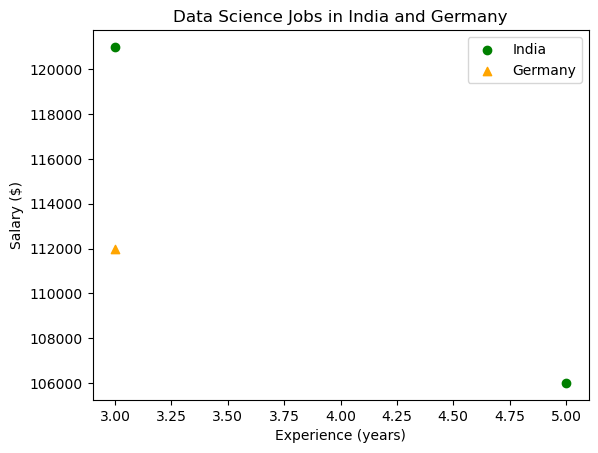

In [247]:
fig, ax = plt.subplots()

# Separate data for India and Germany
india_data = filtered_df[filtered_df['Country'] == 'India']
germany_data = filtered_df[filtered_df['Country'] == 'Germany']

# Plot India data
ax.scatter(india_data['Min Experience'], india_data['Max Salary'], color=india_color, label='India', marker='o')

# Plot Germany data
ax.scatter(germany_data['Min Experience'], germany_data['Max Salary'], color=germany_color, label='Germany', marker='^')

# Add labels and legend
ax.set_xlabel('Experience (years)')
ax.set_ylabel('Salary ($)')
ax.set_title('Data Science Jobs in India and Germany')
ax.legend()

# Show the plot
plt.show()

In [248]:
# Create an interactive map
map_ = folium.Map(location=[20, 0], zoom_start=2)

# Add markers to the map
for _, row in filtered_df.iterrows():
    popup_content = (f"Country: {row['Country']}<br>"
                     f"Qualifications: {row['Qualifications']}<br>"
                     f"Work Type: {row['Work Type']}<br>"
                     f"Experience: {row['Average Experience']} years<br>"
                     f"Job Title: {row['Job Title']}<br>"
                     f"Salary: {row['Max Salary']}<br>"
                     f"Job Portal: {row['Job Portal']}<br>"
                     f"Preference: {row['Preference']}<br>"
                     f"Job Posting Date: {row['Job Posting Date'].date()}<br>")

    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_content, max_width=300),
        tooltip=f"Click for details about {row['Country']}",
        icon=folium.Icon(color=india_color if row['Country'] == 'India' else germany_color)
    ).add_to(map_)

# Save the map to an HTML file
# map_.save("interactive_map.html")

# Display the map
map_

In [205]:
t3.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile',
       'Min Salary', 'Max Salary', 'Average Salary', 'Experience_Midpoint',
       'Min Experience', 'Max Experience', 'Average Experience'],
      dtype='object')

# With Job Title Filter

In [226]:
filtered_df1 = t3[
    (t3['Country'].isin(['India', 'Germany'])) &
    (t3['Qualifications'] == 'B.Tech') &
    (t3['Work Type'] == 'Full-Time') &
    (t3['Average Experience'] > 2) &
    (t3['Job Title'].str.contains('Data Scientist')) &
    (t3['Max Salary'] > 100000) &
    (t3['Job Portal'] == 'Indeed') &
    (t3['Preference'] == 'Female') &
    (t3['Job Posting Date'] < '2023-08-01')
]

In [227]:
def get_colors():
    current_hour = datetime.now().hour
    if 12 <= current_hour <= 18:
        return 'green', 'orange'  # Swap colors
    else:
        return 'orange', 'green'

india_color, germany_color = get_colors()

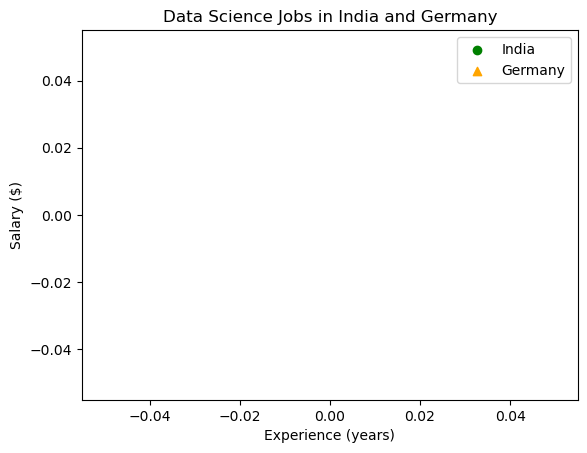

In [233]:
fig, ax = plt.subplots()

# Separate data for India and Germany
india_data = filtered_df1[filtered_df1['Country'] == 'India']
germany_data = filtered_df1[filtered_df1['Country'] == 'Germany']

# Plot India data
ax.scatter(india_data['Min Experience'], india_data['Max Salary'], color=india_color, label='India', marker='o')

# Plot Germany data
ax.scatter(germany_data['Min Experience'], germany_data['Max Salary'], color=germany_color, label='Germany', marker='^')

# Add labels and legend
ax.set_xlabel('Experience (years)')
ax.set_ylabel('Salary ($)')
ax.set_title('Data Science Jobs in India and Germany')
ax.legend()

# Show the plot
plt.show()

In [234]:
# Create an interactive map
map_ = folium.Map(location=[20, 0], zoom_start=2)

# Add markers to the map
for _, row in filtered_df1.iterrows():
    popup_content = (f"Country: {row['Country']}<br>"
                     f"Qualifications: {row['Qualifications']}<br>"
                     f"Work Type: {row['Work Type']}<br>"
                     f"Experience: {row['Average Experience']} years<br>"
                     f"Job Title: {row['Job Title']}<br>"
                     f"Salary: {row['Max Salary']}<br>"
                     f"Job Portal: {row['Job Portal']}<br>"
                     f"Preference: {row['Preference']}<br>"
                     f"Job Posting Date: {row['Job Posting Date'].date()}<br>")

    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_content, max_width=300),
        tooltip=f"Click for details about {row['Country']}",
        icon=folium.Icon(color=india_color if row['Country'] == 'India' else germany_color)
    ).add_to(map_)

# Save the map to an HTML file
# map_.save("interactive_map.html")

# Display the map
map_

In [235]:
t3.dtypes

Job Id                          int64
Experience                     object
Qualifications                 object
Salary Range                   object
location                       object
Country                        object
latitude                      float64
longitude                     float64
Work Type                      object
Company Size                    int64
Job Posting Date       datetime64[ns]
Preference                     object
Contact Person                 object
Contact                        object
Job Title                      object
Role                           object
Job Portal                     object
Job Description                object
Benefits                       object
skills                         object
Responsibilities               object
Company                        object
Company Profile                object
Min Salary                      int64
Max Salary                      int64
Average Salary                float64
Experience_M

In [237]:
t3.isnull().sum()

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile        0
Min Salary             0
Max Salary             0
Average Salary         0
Experience_Midpoint    0
Min Experience         0
Max Experience         0
Average Experience     0
dtype: int64

In [238]:
# # Convert DataFrame to CSV file
# t3.to_csv('Job_portal.csv', index=False)